# Example 1

Similar to one sample t-test

Email Engagement Analysis Report

Detailed Comparison:
 Email Type  Observed Count  Expected Count  Observed %  Expected %  Difference
New Product             420           420.0        35.0        35.0         0.0
Flash Sales             380           360.0        31.7        30.0         1.7
   Seasonal             160           240.0        13.3        20.0        -6.7
    Loyalty             240           180.0        20.0        15.0         5.0

Statistical Test Results:
Chi-squared statistic: 47.78
P-value: 0.0000

Interpretation:
There is significant evidence that the new email template
has changed engagement patterns (p < 0.05)

Biggest changes in engagement:
Seasonal: -6.7% difference
Loyalty: +5.0% difference
Flash Sales: +1.7% difference
New Product: +0.0% difference


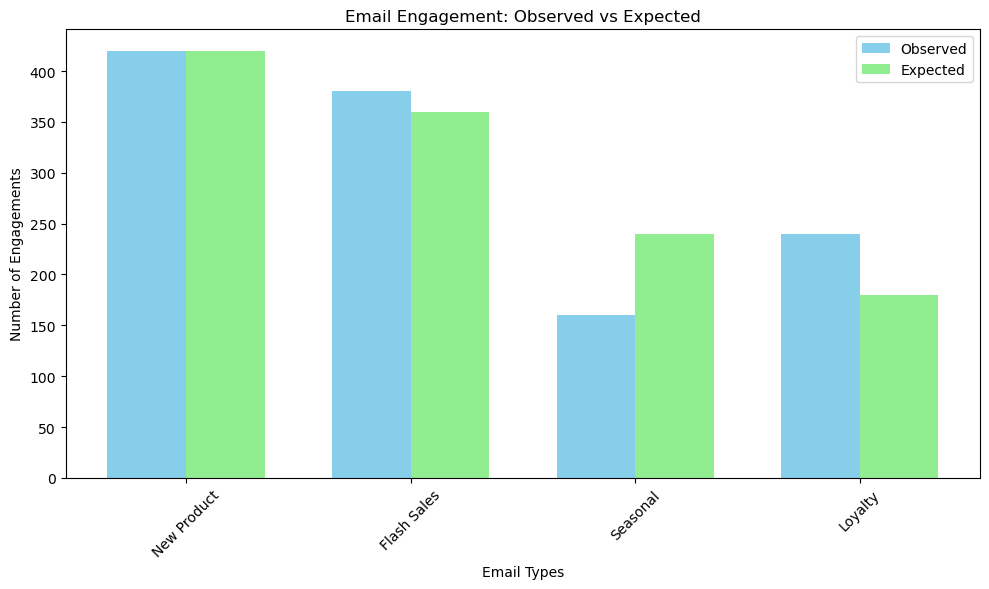

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

def analyze_email_engagement(observed_counts, expected_proportions, email_types):
    """
    Analyzes whether email engagement patterns match historical patterns
    
    Parameters:
        observed_counts: Array of engagement counts for each email type
        expected_proportions: Array of historical engagement proportions
        email_types: List of email category names
    """
    # Calculate total observations and expected counts
    total_engagements = sum(observed_counts)
    expected_counts = total_engagements * expected_proportions
    
    # Perform chi-squared test
    test_statistic, p_value = stats.chisquare(observed_counts, expected_counts)
    
    # Create comparison DataFrame for clear reporting
    comparison_df = pd.DataFrame({
        'Email Type': email_types,
        'Observed Count': observed_counts,
        'Expected Count': expected_counts,
        'Observed %': (observed_counts / total_engagements * 100).round(1),
        'Expected %': (expected_proportions * 100).round(1),
        'Difference': ((observed_counts / total_engagements - expected_proportions) * 100).round(1)
    })
    
    # Visualize the comparison
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    index = np.arange(len(email_types))
    
    plt.bar(index, observed_counts, bar_width, label='Observed',
            color='skyblue')
    plt.bar(index + bar_width, expected_counts, bar_width,
            label='Expected', color='lightgreen')
    
    plt.xlabel('Email Types')
    plt.ylabel('Number of Engagements')
    plt.title('Email Engagement: Observed vs Expected')
    plt.xticks(index + bar_width/2, email_types, rotation=45)
    plt.legend()
    plt.tight_layout()
    
    # Print detailed analysis
    print("Email Engagement Analysis Report")
    print("=" * 50)
    print("\nDetailed Comparison:")
    print(comparison_df.to_string(index=False))
    print("\nStatistical Test Results:")
    print(f"Chi-squared statistic: {test_statistic:.2f}")
    print(f"P-value: {p_value:.4f}")
    print("\nInterpretation:")
    if p_value < 0.05:
        print("There is significant evidence that the new email template")
        print("has changed engagement patterns (p < 0.05)")
        
        # Find biggest changes
        differences = comparison_df.sort_values('Difference', key=abs, ascending=False)
        print("\nBiggest changes in engagement:")
        for _, row in differences.iterrows():
            print(f"{row['Email Type']}: {row['Difference']:+.1f}% difference")
    else:
        print("There is no significant evidence that the new email template")
        print("has changed engagement patterns (p >= 0.05)")

# Your recent data after implementing the new template
email_types = ['New Product', 'Flash Sales', 'Seasonal', 'Loyalty']
observed_counts = np.array([420, 380, 160, 240])  # 1200 total engagements
expected_proportions = np.array([0.35, 0.30, 0.20, 0.15])

# Run the analysis
analyze_email_engagement(observed_counts, expected_proportions, email_types)

# Practice

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read in the healthcare appointments data
# Note: Replace 'clinic_appointments.csv' with your actual file path
df = pd.read_csv('clinic_appointments.csv')
#df = df.drop(columns=['Unnamed: 0'])
df.head()

,Unnamed: 0,TimeSlot,BookingMethod,Attended
0,0,Morning,Phone,Yes
1,1,Evening,Online,Yes
2,2,Afternoon,Mobile App,No
3,3,Afternoon,Online,Yes
4,4,Morning,Mobile App,Yes


In [16]:
# Let's first look at our data structure
print("Basic Dataset Information:")
print("-" * 30)
print(df.info())

Basic Dataset Information:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1000 non-null   int64 
 1   TimeSlot       1000 non-null   object
 2   BookingMethod  1000 non-null   object
 3   Attended       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None


In [17]:
# Check the first few rows to confirm data looks correct
print("\nFirst Few Appointments:")
print("-" * 30)
print(df.head())


First Few Appointments:
------------------------------
   Unnamed: 0   TimeSlot BookingMethod Attended
0           0    Morning         Phone      Yes
1           1    Evening        Online      Yes
2           2  Afternoon    Mobile App       No
3           3  Afternoon        Online      Yes
4           4    Morning    Mobile App      Yes


In [19]:
# Get distribution of our key categorical variables
print("\nDistribution of Time Slots:")
print("-" * 30)
time_dist = df['TimeSlot'].value_counts()
print(time_dist)
print("\nPercentage by Time Slot:")
print((time_dist / len(df) * 100).round(1))


Distribution of Time Slots:
------------------------------
TimeSlot
Morning      471
Afternoon    330
Evening      199
Name: count, dtype: int64

Percentage by Time Slot:
TimeSlot
Morning      47.1
Afternoon    33.0
Evening      19.9
Name: count, dtype: float64


In [20]:
print("\nDistribution of Booking Methods:")
print("-" * 30)
booking_dist = df['BookingMethod'].value_counts()
print(booking_dist)
print("\nPercentage by Booking Method:")
print((booking_dist / len(df) * 100).round(1))


Distribution of Booking Methods:
------------------------------
BookingMethod
Phone         370
Online        367
Mobile App    263
Name: count, dtype: int64

Percentage by Booking Method:
BookingMethod
Phone         37.0
Online        36.7
Mobile App    26.3
Name: count, dtype: float64


In [21]:
# Create a cross-tabulation of booking methods and attendance
print("\nBooking Method vs. Attendance:")
print("-" * 30)
booking_attendance = pd.crosstab(df['BookingMethod'], df['Attended'])
print(booking_attendance)

# Calculate attendance rates by booking method
attendance_rates = (booking_attendance['Yes'] /
                  booking_attendance.sum(axis=1) * 100).round(1)
print("\nAttendance Rates by Booking Method (%):")
print(attendance_rates)


Booking Method vs. Attendance:
------------------------------
Attended       No  Yes
BookingMethod         
Mobile App     36  227
Online         35  332
Phone          52  318

Attendance Rates by Booking Method (%):
BookingMethod
Mobile App    86.3
Online        90.5
Phone         85.9
dtype: float64


In [14]:
# Check for missing values
print("\nMissing Values Check:")
print("-" * 30)
print(df.isnull().sum())


Missing Values Check:
------------------------------
TimeSlot         0
BookingMethod    0
Attended         0
dtype: int64


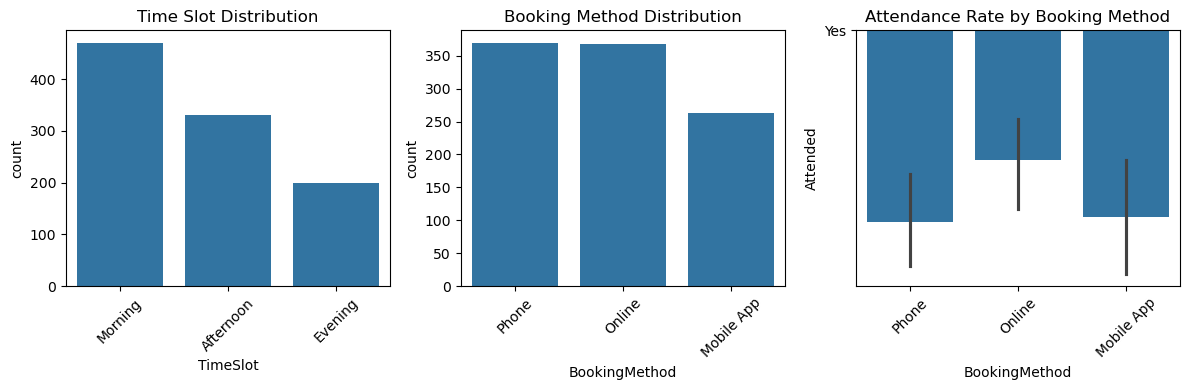

In [23]:
# Visualize key distributions
plt.figure(figsize=(12, 4))


# Time slot distribution
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='TimeSlot', order=['Morning', 'Afternoon', 'Evening'])
plt.title('Time Slot Distribution')
plt.xticks(rotation=45)


# Booking method distribution
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='BookingMethod')
plt.title('Booking Method Distribution')
plt.xticks(rotation=45)


# Attendance by booking method
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='BookingMethod', y='Attended')
plt.title('Attendance Rate by Booking Method')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


# This initial EDA helps us:
# 1. Confirm our data is loaded correctly
# 2. See if we meet minimum frequency requirements for chi-square tests
# 3. Get a preliminary view of potential patterns before formal testing

# Example 2

test of independence

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1: Test of Independence - Age Groups vs. Appointment Times
def analyze_appointment_preferences(data):
    """
    Analyzes the relationship between patient age groups and appointment preferences
    
    Parameters:
        data: DataFrame with columns 'Age_Group' and 'Appointment_Time'
    """
    # Create contingency table
    contingency_table = pd.crosstab(
        data['Age_Group'], 
        data['Appointment_Time'],
        margins=True  # Add row and column totals
    )
    
    # Remove the totals for the chi-square test
    test_table = contingency_table.iloc[:-1, :-1]
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(test_table)
    
    # Create visualization
    plt.figure(figsize=(12, 5))
    sns.heatmap(test_table, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Patient Appointment Preferences by Age Group')
    plt.tight_layout()
    
    # Calculate proportions for easier interpretation
    proportions = test_table.div(test_table.sum(axis=1), axis=0)
    
    return {
        'contingency_table': contingency_table,
        'chi2_stat': chi2_stat,
        'p_value': p_value,
        'dof': dof,
        'proportions': proportions
    }

test of homogenity

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Part 2: Test of Homogeneity - Patient Satisfaction Across Locations
def analyze_satisfaction_distribution(data):
    """
    Compares patient satisfaction distributions across hospital locations
    
    Parameters:
        data: DataFrame with columns 'Location' and 'Satisfaction_Rating'
    """
    # Create contingency table
    contingency_table = pd.crosstab(
        data['Location'],
        data['Satisfaction_Rating'],
        margins=True
    )
    
    test_table = contingency_table.iloc[:-1, :-1]
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(test_table)
    
    # Visualize distributions
    plt.figure(figsize=(12, 5))
    
    # Convert to percentages for easier comparison
    proportions = test_table.div(test_table.sum(axis=1), axis=0) * 100
    
    proportions.plot(kind='bar', stacked=True)
    plt.title('Satisfaction Ratings Distribution by Location')
    plt.xlabel('Hospital Location')
    plt.ylabel('Percentage')
    plt.legend(title='Satisfaction Rating')
    plt.tight_layout()
    
    return {
        'contingency_table': contingency_table,
        'chi2_stat': chi2_stat,
        'p_value': p_value,
        'dof': dof,
        'proportions': proportions
    }

# Generate sample data for demonstration
np.random.seed(42)
n_patients = 1000

# Sample data for appointment analysis
appointment_data = pd.DataFrame({
    'Age_Group': np.random.choice(
        ['18-30', '31-50', '51-70', '70+'],
        size=n_patients,
        p=[0.25, 0.35, 0.25, 0.15]
    ),
    'Appointment_Time': np.random.choice(
        ['Morning', 'Afternoon', 'Evening'],
        size=n_patients
    )
})

# Sample data for satisfaction analysis
satisfaction_data = pd.DataFrame({
    'Location': np.random.choice(
        ['Downtown', 'North', 'South', 'West'],
        size=n_patients,
        p=[0.3, 0.25, 0.25, 0.2])})